#### First lets start with a coin flips.

The below method should simulate coin flips with a probability of heads given by p

In [2]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
l = [2.1,4.1,6.1]
np.power(l,2)

array([ 4.41, 16.81, 37.21])

In [10]:
def coinflip(p=0.5):
    value = random.random()
    return value <= p

Flip coin 5 times

In [5]:
flip_value = {0: 'Tails', 1: 'Heads'}
for i in range(5):
    print(f"Coin flipped and came up {flip_value[coinflip()]}")

Coin flipped and came up Tails
Coin flipped and came up Heads
Coin flipped and came up Tails
Coin flipped and came up Heads
Coin flipped and came up Tails


For a fair coin, when we flip a coin many times, the probability of coming up heads or tails is the same. We can plot this distribution as shown below.

In [6]:
def plotdistribution(data, x_pos):
    fig, ax = plt.subplots()
    freqs = np.bincount(data)
    x_range = np.arange(len(x_pos))

    ax.bar(x_range, freqs, align='center', alpha=0.5)
    ax.set_ylabel('Outcomes')
    ax.set_xticks(x_range)
    ax.set_xticklabels(x_pos)
    ax.set_title('Outcome Distribution')
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    #plt.savefig('bar_plot.png')
    plt.show()

We know that for a fair coin the probability for each outcome is 0.5. But if we do not know if the coin is fair or not, we can just flip the coin lots of times. The resulting distribution of observations will give a good estimate of the probability of the coin as shown below.

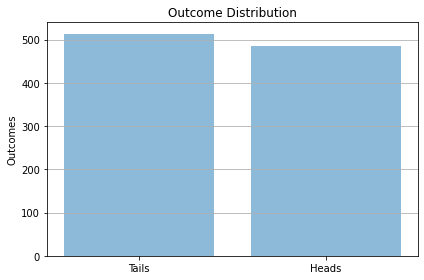

In [7]:
coin_flip_data = np.asarray([coinflip() for x in range(1000)])
plotdistribution(coin_flip_data, ['Tails', 'Heads'])


Above we plotted the distribution for a fair coin. We can similarly plot outcomes for a loaded coin.
For example, for p= 0.3, the outcome distrubiton looks as shown below

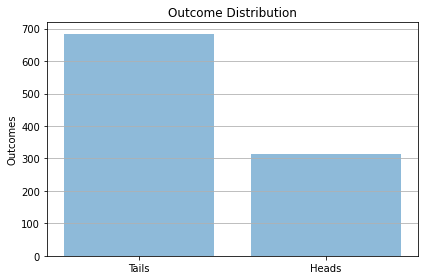

In [11]:
coin_flip_data_1 = np.asarray([coinflip(p=0.3) for x in range(1000)])
plotdistribution(coin_flip_data_1, ['Tails', 'Heads'])

For p=0.7, the outcome distribution looks like this

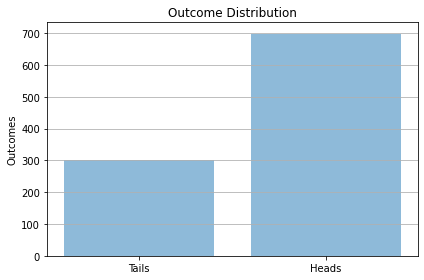

In [12]:
coin_flip_data_2 = np.asarray([coinflip(p=0.7) for x in range(1000)])
plotdistribution(coin_flip_data_2, ['Tails', 'Heads'])

### Joint Probability Distribution

Now if instead of flipping 1 coin, we want to find the probability distribution of 2 coin flips. In that case there are 4 possible outcomes. For a fair coin the outcome distribution will be the joint probability of the 2 coin tosses. The truth table and the associated probability of the outcome is shown below. The probability distribution for p = 0.3 and p = 0.7 is also given.

| Flip 1  | Flip 2 | p = 0.5         | p = 0.3         | p = 0.7       |
|:--------|:-------|:----------------|:----------------|:--------------|
| 0       | 0      | 0.5*0.5 = 0.25  | 0.7*0.7 = 0.49  | 0.3*0.3 = 0.18|
| 0       | 1      | 0.5*0.5 = 0.25  | 0.7*0.3 = 0.21  | 0.3*0.7 = 0.21|
| 1       | 0      | 0.5*0.5 = 0.25  | 0.3*0.7 = 0.21  | 0.7*0.3 = 0.21|
| 1       | 1      | 0.5*0.5 = 0.25  | 0.3*0.3 = 0.18  | 0.7*0.7 = 0.49|

Here I given the number of trials just retrieve the likelihood distribution

In [5]:
def likelihood(nTrials, nSuccess, resolution=100):
    '''
        nTrials is the number of experiments (e.g. number of coin flips)
        nSuccess is the number of success (e.g. number of heads in nTrials)
        returns a likelihood distribution - a dataframe of values for p -> [0,1], where p is the probability of success. 
    '''

    if nSuccess > nTrials:
        return "Wrong Input"

    p_range = np.linspace(0, 1, resolution)
    event_probability = np.multiply(np.power(p_range, nSuccess), np.power((1-p_range), nTrials-nSuccess))
    denom = math.factorial(nTrials-nSuccess)*math.factorial(nSuccess)
    number_of_outcomes = math.factorial(nTrials)/denom
    l = np.multiply(event_probability,number_of_outcomes)
    return pd.DataFrame({'p':p_range, 'likelihood': l})

Plot the likelihood distribution

<AxesSubplot:xlabel='p'>

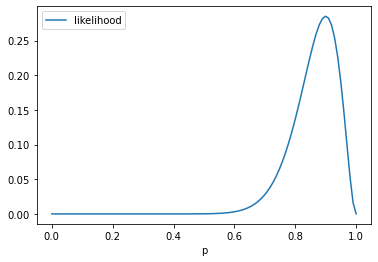

In [6]:
lik_dist = likelihood(20,18, resolution=100)
#print(lik_dist)
lik_dist.plot(x ='p', y='likelihood', kind = 'line')